# Metody eksploracji danych - laboratorium 2 zadanie 3

In [1]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych

In [2]:
base_path = Path('data')
file_path = base_path / 'med_lab_2_zad_3.csv'

In [5]:
df = pd.read_csv(file_path, sep=';')

In [6]:
df.head()

,Nr_miesiąca,Liczba_błędów
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
df.describe()

,Nr_miesiąca,Liczba_błędów
count,93.000000,93.00000
mean,47.000000,2.83871
std,26.990739,3.92398
min,1.000000,0.00000
25%,24.000000,0.00000
50%,47.000000,1.00000
75%,70.000000,4.00000
max,93.000000,19.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nr_miesiąca    93 non-null     int64
 1   Liczba_błędów  93 non-null     int64
dtypes: int64(2)
memory usage: 1.6 KB


## Wykresy

<Axes: xlabel='Nr_miesiąca'>

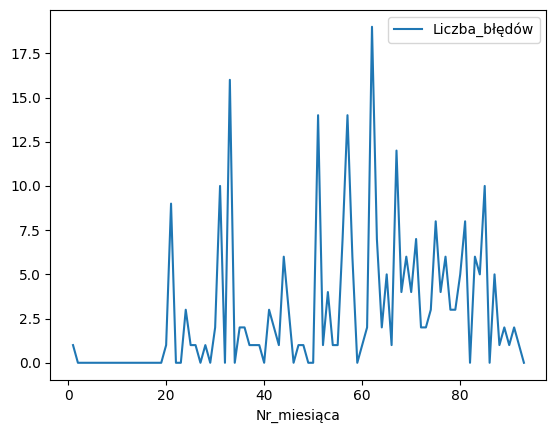

In [11]:
df.plot(x='Nr_miesiąca', y='Liczba_błędów')

### Dodanie kolumny z sumowaną wartością błędów

In [12]:
df['Suma_błędów'] = df['Liczba_błędów'].cumsum()

In [16]:
df.head(n=25)

,Nr_miesiąca,Liczba_błędów,Suma_błędów
0,1,1,1
1,2,0,1
2,3,0,1
3,4,0,1
4,5,0,1
5,6,0,1
6,7,0,1
7,8,0,1
8,9,0,1
9,10,0,1


<Axes: xlabel='Nr_miesiąca'>

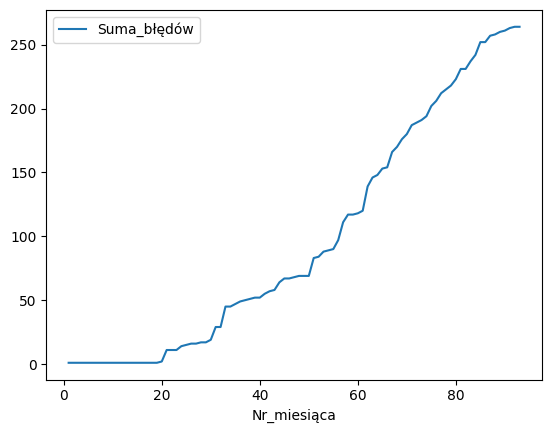

In [32]:
df.plot(x='Nr_miesiąca', y='Suma_błędów')

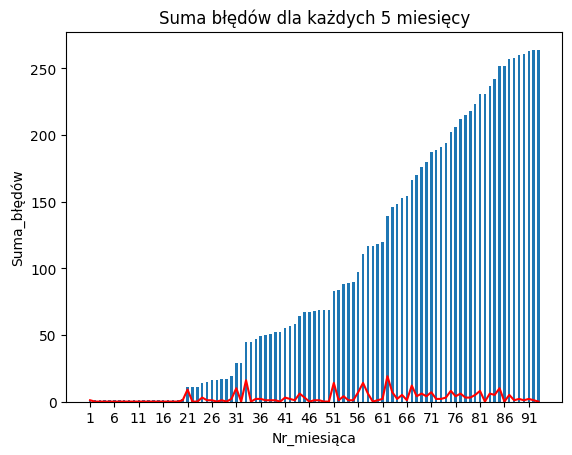

In [33]:
plt.bar(df['Nr_miesiąca'], df['Suma_błędów'], width=0.5)
plt.plot(df['Nr_miesiąca'], df['Liczba_błędów'], color='red')
plt.xticks(np.arange(1, max(df['Nr_miesiąca']), 5))
plt.xlabel('Nr_miesiąca')
plt.ylabel('Suma_błędów')
plt.title('Suma błędów dla każdych 5 miesięcy')
plt.show()

## Podział danych na zbiór treningowy i testowy

In [34]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

## Regresja liniowa

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X_train = df_train['Nr_miesiąca'].values.reshape(-1, 1)
y_train = df_train['Suma_błędów'].values.reshape(-1, 1)
X_test = df_test['Nr_miesiąca'].values.reshape(-1, 1)
y_test = df_test['Suma_błędów'].values.reshape(-1, 1)

In [37]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Testowanie modelu

In [38]:
y_pred = linear_regression.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 388.64
Coefficient of determination: 0.95


### Wykres regresji

### Wykres dla danych traningowych

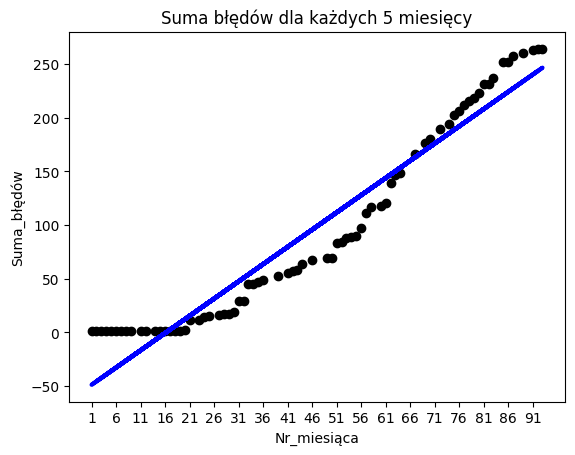

In [48]:
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, linear_regression.predict(X_train), color='blue', linewidth=3)
plt.xticks(np.arange(1, max(df['Nr_miesiąca']), 5))
plt.xlabel('Nr_miesiąca')
plt.ylabel('Suma_błędów')
plt.title('Suma błędów dla każdych 5 miesięcy')
plt.show()

### Wykres dla danych testowych

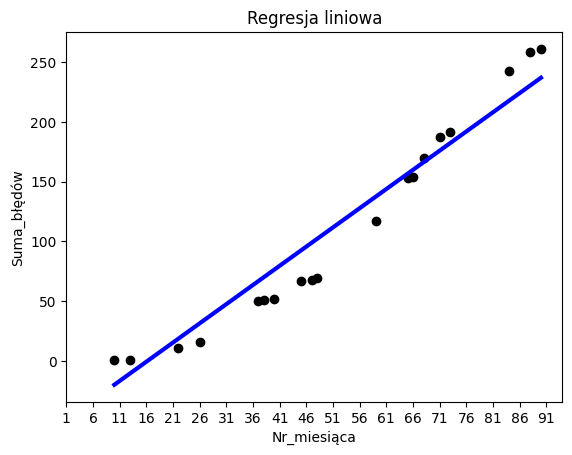

In [47]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(np.arange(1, max(df['Nr_miesiąca']), 5))
plt.xlabel('Nr_miesiąca')
plt.ylabel('Suma_błędów')
plt.title('Regresja liniowa')
plt.show()

### Równanie modelu regresji liniowej

In [49]:
print('Współczynnik: %.2f' % linear_regression.coef_[0][0])
print('Wyraz wolny: %.2f' % linear_regression.intercept_[0])

Współczynnik: 3.21
Wyraz wolny: -52.11
